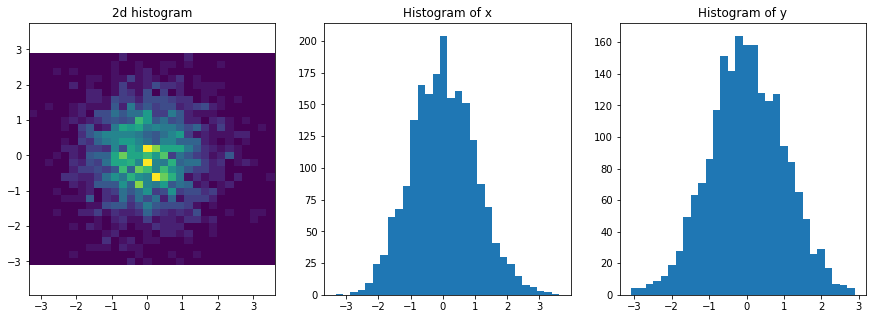

In [21]:
#task7: normal disribution
#Box-Muller number1
import numpy as np
import matplotlib.pyplot as plt

n = 1000
r = np.random.rand(n)
theta = 2*np.pi*np.random.rand(n)
x = np.sqrt(-2 * np.log(r)) * np.cos(theta)
y = np.sqrt(-2 * np.log(r))* np.sin(theta)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[0].set_title("2d histogram")
ax[1].hist(x, bins=30)
ax[1].set_title("Histogram of x")
ax[2].hist(y, bins=30)
ax[2].set_title("Histogram of y")

plt.show()

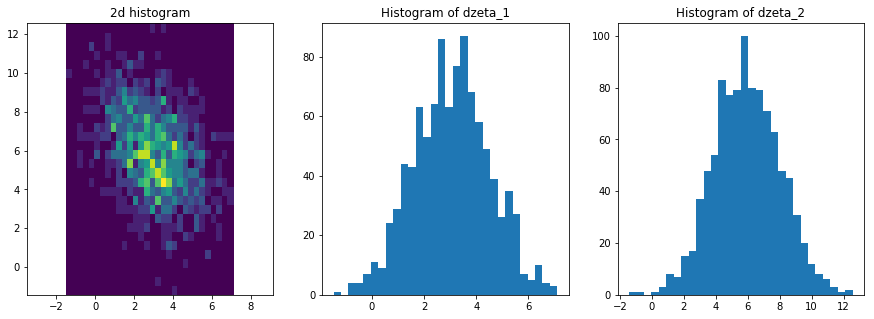

In [80]:
#Box-Muller number2
import numpy as np
import matplotlib.pyplot as plt

N=1000
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

def give_indep_stand_norm():
    x=-1+2*rng()
    y=-1+2*rng()
    while((x*x + y*y >1) or (x*x + y*y ==0)):
        x=-1+2*rng()
        y=-1+2*rng()
    
    s= x*x + y*y
    a = x*np.sqrt(-2 * np.log(s)/s) 
    b = y*np.sqrt(-2 * np.log(s)/s) 
    return a,b

def matrix_mult_matrix(A,B):
    T=np.zeros(4) 
    T=T.reshape((2,2))
    for i in range(2):
        for j in range(2):
            s=0
            for k in range(2):
                s=s+A[i][k]*B[k][j]
            T[i][j]=s
    return T

def matrix_mult_vector(A,X):
    T=np.zeros(2) 
    T=T.reshape((2,1))
    for i in range(2):
        s=0
        for k in range(2):
            s=s+A[i][k]*X[k]
        T[i]=s
    return T

            


J=np.zeros(4) 
J=J.reshape((2,2))
J[0][0]=3+np.sqrt(2)
J[1][1]=3-np.sqrt(2)

C=np.zeros(4) 
C=C.reshape((2,2))
C[0][0]=(-1+np.sqrt(2))/(np.sqrt(4-2*np.sqrt(2)))
C[0][1]=(-1-np.sqrt(2))/(np.sqrt(4+2*np.sqrt(2)))
C[1][0]=1/(np.sqrt(4-2*np.sqrt(2)))
C[1][1]=1/(np.sqrt(4+2*np.sqrt(2)))


C_inv=np.linalg.inv(C)

mean36=np.zeros(2).reshape((2,1))
mean36[0]=3
mean36[1]=6
mean=matrix_mult_vector(C,mean36)


ksi_1=np.zeros(N)
ksi_2=np.zeros(N)
for i in range(N):
    a,b=give_indep_stand_norm()
    ksi_1[i]=a
    ksi_2[i]=b

ksi_1=ksi_1*np.sqrt(3+np.sqrt(2))
ksi_2=ksi_2*np.sqrt(3-np.sqrt(2))


eta_1=np.zeros(N)
eta_2=np.zeros(N)
for i in range(N):
    eta_1[i]=C_inv[0][0]*ksi_1[i]+C_inv[0][1]*ksi_2[i]
    eta_2[i]=C_inv[1][0]*ksi_1[i]+C_inv[1][1]*ksi_2[i]

dzeta_1=np.zeros(N)
dzeta_2=np.zeros(N)
dzeta_1=3+eta_1
dzeta_2=6+eta_2


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(dzeta_1, dzeta_2, bins=30)
ax[0].axis('equal')
ax[0].set_title("2d histogram")
ax[1].hist(dzeta_1, bins=30)
ax[1].set_title("Histogram of dzeta_1")
ax[2].hist(dzeta_2, bins=30)
ax[2].set_title("Histogram of dzeta_2")

plt.show()



mean amount of colors= 28.692


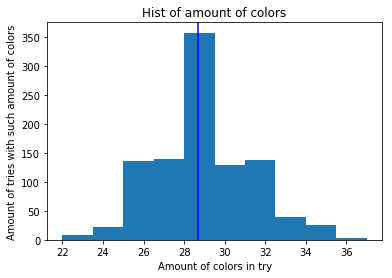

In [170]:
#task8: Partitions of a set
import numpy as np
import matplotlib.pyplot as plt
import math
N=100
tries=1000

def give_Bell_numbers(N):
    mas=np.zeros(N+1)
    mas[0]=1
    for n in range(1,N+1):
        s=0
        for k in range (0,n):
            s=s+mas[k]* math.factorial(n-1)/( math.factorial(k)* math.factorial(n-1-k))
        mas[n]=s
    return mas
def find_amount_of_colors(mas_of_weights,mas_of_values):
    K=np.random.choice(mas_of_values, None, True, mas_of_weights[1:]) 
    mas_of_col=np.zeros(N)
    for i in range(N):
        mas_of_col[i]=int(1+K*rng())
    return len(np.unique(mas_of_col))
    

Bell_numbers=np.zeros(N+1)
Bell_numbers= give_Bell_numbers(N)
#print(Bell_numbers)

mas_of_weights=np.zeros(N+1)
s=0
for k in range(1,N+1):
    mas_of_weights[k]=math.pow(k,N)/((math.e)*(math.factorial(k))*(Bell_numbers[N]))
    s=s+mas_of_weights[k]
mas_of_weights=mas_of_weights/s
mas_of_values=1+np.arange(N)

mas_of_tries=np.zeros(tries)
for i in range(tries):
    mas_of_tries[i]=find_amount_of_colors(mas_of_weights,mas_of_values)

print("mean amount of colors=",mas_of_tries.mean())
plt.hist(mas_of_tries)
plt.axvline(mas_of_tries.mean(),c='b')
plt.title("Hist of amount of colors")
plt.xlabel("Amount of colors in try")
plt.ylabel("Amount of tries with such amount of colors")
plt.show()